# Part 2 - Time Series Analysis

## Table of Contents

8. [Stationary and non-stationary Time Series](#8)<br>
9. [How to make a Time Series stationary?](#9)<br>
10. [How to test for stationarity?](#10)<br>
11. [What is the difference between white noise and a stationary series?](#11)<br>     


12. [How to detrend a Time Series?](#12)<br>     


13. [How to deseasonalize a Time Series?](#13)<br>
14. [How to test for seasonality of a Time Series?](#14)<br>     


15. [How to treat missing values in a Time Series?](#15)<br>
16. [What is autocorrelation and partial autocorrelation functions?](#16)<br>
17. [Lag Plots](#17)<br>
18. [How to estimate the forecastability of a Time Series?](#18)<br>
19. [Why and How to smoothen a Time Series?](#19)<br>
20. [How to use Granger Causality test to know if one Time Series is helpful in forecasting another?](#20)<br>

<a id="8"></a>
## 8. Stationary and non-stationary Time Series

A stationary series is one where the values of the series is not a function of time. That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. Thus, **a stationary time series id devoid of seasonal effects, trend and changing variation as well.**

<img src="images/p8.png">

Most statistical forecasting methods are designed to work on a stationary time series. **The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.**

<a id="9"></a>
## 9. How to make a Time Series stationary?

One can make series stationary by:
1. Differencing the Series (once or more)
2. Take the log of the series
3. Take the nth root of the series
4. Combination of the above

The most common and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

**So what is differencing?**
For example, consider the following series: [1, 5, 2, 12, 20]     
First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]     
Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]

<a id="10"></a>
## 10. How to test for stationarity?

There are multiple implementations of Unit Root tests like:
1. Augmented Dickey Fuller test (ADH Test)
2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
3. Philips Perron test (PP Test)

**The ADF test:** *Null hypothesis:* the time series possesses a unit root and is non-stationary.     
So, if the `P-Value < significance level (0.05) than stationary else not-stationary.`

**The KPSS test**: *Null hypothesis:* the time series is stationary and do not possess an unit root.     
So, if the `p-value < significance level (0.05) than not-stationary or else stationary.`

There are two packages that can be used to perform these tests: 1.  [statsmodels](https://www.statsmodels.org/dev/tsa.html) 2. [ARCH](https://arch.readthedocs.io/en/latest/unitroot/tests.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

# ADF Test
adf_result = adfuller(df.value.values, autolag='AIC')
print('ADF Statistic: {}'.format(adf_result[0]))
print('p-value: {}'.format(adf_result[1]))
for key, value in adf_result[4].items():
    print('Critial Values: {} -> {}'.format(key, value))

# KPSS Test
kpss_result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: {}'.format(kpss_result[0]))
print('p-value: {}'.format(kpss_result[1]))
for key, value in kpss_result[3].items():
    print('Critial Values: {} -> {}'.format(key, value))

ADF Statistic: 3.14518568930673
p-value: 1.0
Critial Values: 1% -> -3.465620397124192
Critial Values: 5% -> -2.8770397560752436
Critial Values: 10% -> -2.5750324547306476

KPSS Statistic: 1.3136750533447588
p-value: 0.01
Critial Values: 10% -> 0.347
Critial Values: 5% -> 0.463
Critial Values: 2.5% -> 0.574
Critial Values: 1% -> 0.739


C:\Users\patel\Anaconda3\envs\Projects\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\patel\Anaconda3\envs\Projects\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<a id="11"></a>
## 11. What is the difference between white noise and a stationary series?

Like a stationary series, the white noise is also not a function of time, that is its mean and variance does not change over time. But the difference is, the white noise is completely random with a mean of 0. In white noise there is no pattern whatsoever. If you consider the sound signals in an FM radio as a time series, the blank sound you hear between the channels is white noise.

Mathematically, **a sequence of completely random numbers with mean zero is a white noise.**

<a id="12"></a>
## 12. How to de-trend a Time Series?

De-trending a time series is to remove the trend component from a time series with any one of the following:

1. Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.

2. Subtract the trend component obtained from time series decomposition we saw earlier.

3. Subtract the mean

4. Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

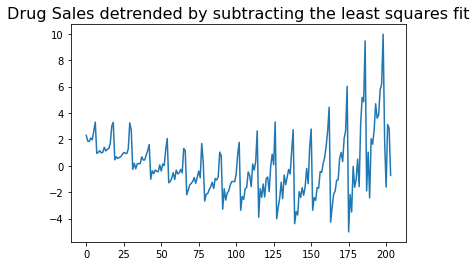

In [2]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df.value.values)

plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

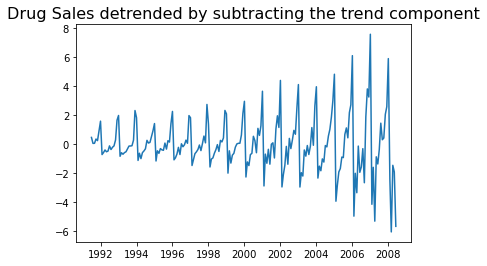

In [3]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df.set_index('date')['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend

plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

<a id="13"></a>
## 13. How to deseasonalize a Time Series?

1. Take a moving average with length as the seasonal window.

2. Seasonal difference the series (subtract the value of previous season from the current value)

3. Divide the series by the seasonal index obtained from STL decomposition     
Note: If dividing by the seasonal index does not work well, try taking a log of the series and then do the deseasonalizing. Can later restore to the original scale by taking an exponential.

[]

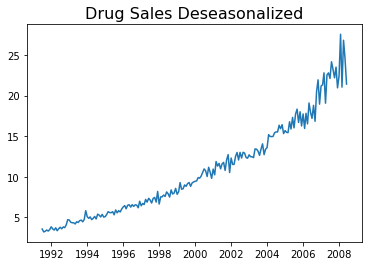

In [4]:
# Time Series Decomposition
result_mul = seasonal_decompose(df.set_index('date')['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

<a id="14"></a>
## 14. How to test for seasonality of a Time Series?

A more definitive inspection of the seasonality is to use the Autocorrelation Function (ACF) plot. More on the ACF in the upcoming sections. 

But **when there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.**

For example, the drug sales time series is a monthly series with patterns repeating every year. So, you can see spikes at 12th, 24th, 36th.. lines.

Alternately the **CHTest**(Canova-Hansen test) can determine if seasonal differencing is required to stationarize the series.

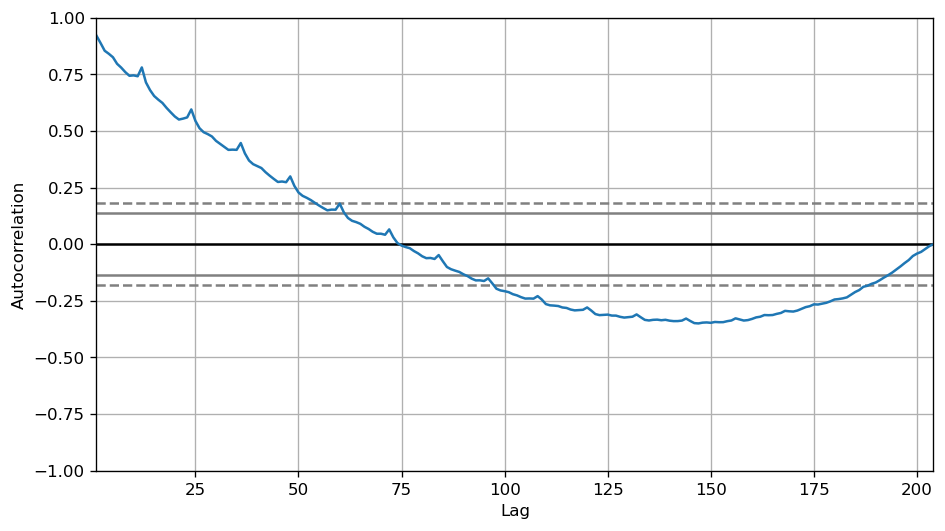

In [5]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

<a id="15"></a>
## 15. How to treat missing values in a Time Series?

Sometimes, time series will have missing dates/times. That means, the data was not captured or was not available for those periods. Secondly, when it comes to time series, one should typically NOT replace missing values with the mean of the series, especially if the series is not stationary.

However, depending on the nature of the series, Some effective alternatives to imputation are:
- Forward Fill
- Backward Fill
- Linear Interpolation
- Quadratic interpolation
- Mean of nearest neighbors
- Mean of seasonal counterparts

Also consider the following approaches depending on how accurate you want the imputations to be.

- If you have explanatory variables use a prediction model like the random forest or k-Nearest Neighbors to predict it.
- If you have enough past observations, forecast the missing values.
- If you have enough future observations, backcast the missing values
- Forecast of counterparts from previous cycles.

To see more go to the notebook.

<a id="16"></a>
## 16. What is autocorrelation and partial autocorrelation functions?

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

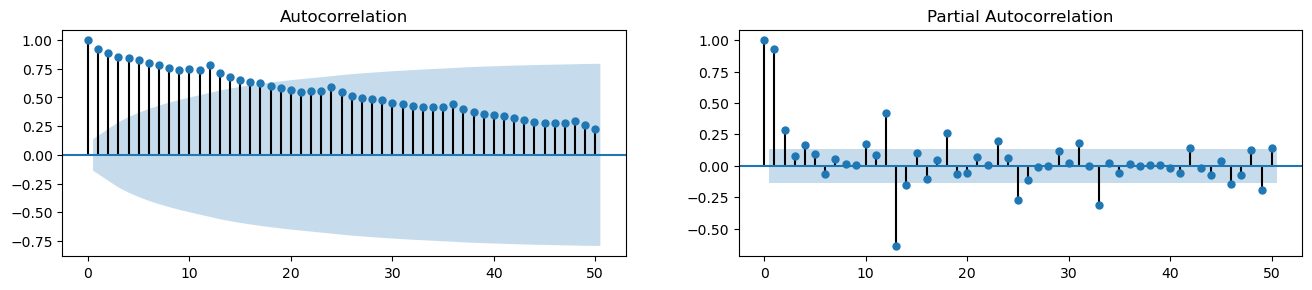

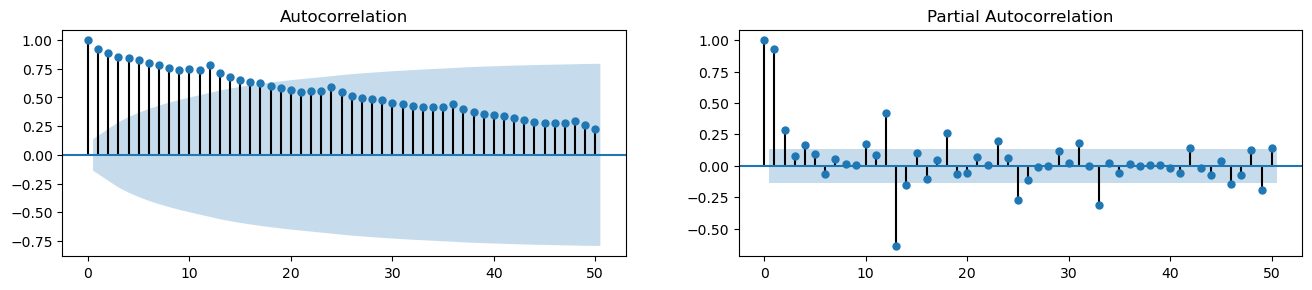

In [6]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

The partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y. The autoregressive equation of Y is nothing but the linear regression of Y with its own lags as predictors.

For Example, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient $\alpha_3$ of Y_t-3.

<a id="17"></a>
## 17. Lag Plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. 

If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

In below example on Sunspots area time series, the plots get more and more scattered as the n_lag increases.

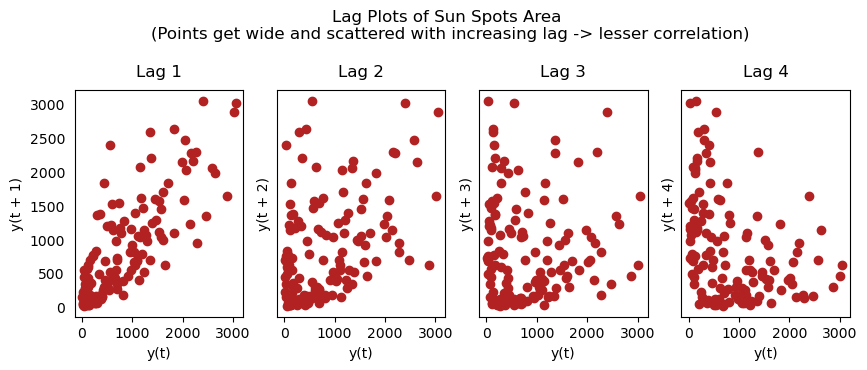

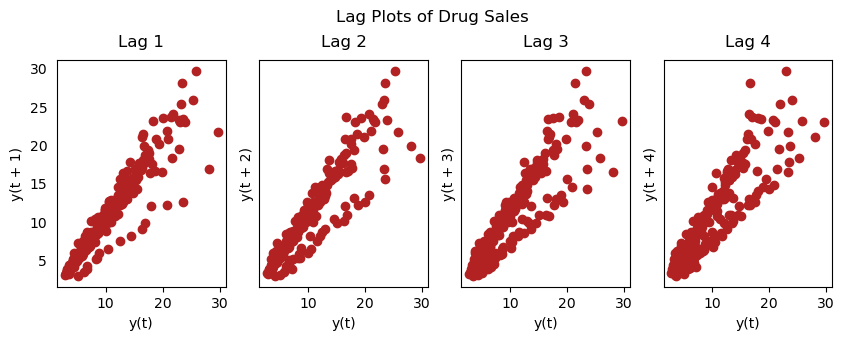

In [7]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

<a id="18"></a>
## 18. How to estimate the forecastability of a Time Series?

The higher the approximate entropy, the more difficult it is to forecast it.

Another better alternate is the ‘Sample Entropy’. Sample Entropy is similar to approximate entropy but is more consistent in estimating the complexity even for smaller time series.

For example, a random time series with fewer data points can have a lower ‘approximate entropy’ than a more ‘regular’ time series, whereas, a longer random time series will have a higher ‘approximate entropy’. Sample Entropy handles this problem nicely. 

In [8]:
# https://en.wikipedia.org/wiki/Approximate_entropy
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(ss.value, m=2, r=0.2*np.std(ss.value)))     # 0.651
print(ApEn(df.value, m=2, r=0.2*np.std(df.value)))   # 0.537
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.716

0.6514704970333534
0.5374775224973489
0.2504716116962724
0.5861146583794774


In [9]:
# https://en.wikipedia.org/wiki/Sample_entropy
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(ss.value, m=2, r=0.2*np.std(ss.value)))      # 0.78
print(SampEn(df.value, m=2, r=0.2*np.std(df.value)))    # 0.41
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.42

0.7853311366380039
0.41887013457621214
2.1972245773362196
1.6094379124341003


<a id="19"></a>
## 19. Why and How to smoothen a Time Series?

Smoothening of a time series may be useful in:
- Reducing the effect of noise in a signal to get a fair approximation of the noise-filtered series.
- The smoothed version of series can be used as a feature to explain the original series itself.
- Visualize the underlying trend better

So how to smoothen a series? Let’s discuss the following methods:
- Take a moving average
- Do a LOESS smoothing (Localized Regression)
- Do a LOWESS smoothing (Locally Weighted Regression)

**Moving average** is nothing but the average of a rolling window of defined width. But you must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

**LOESS, short for ‘LOcalized regrESSion’** fits multiple regressions in the local neighborhood of each point. It is implemented in the `statsmodels` package, where you can control the degree of smoothing using `frac` argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

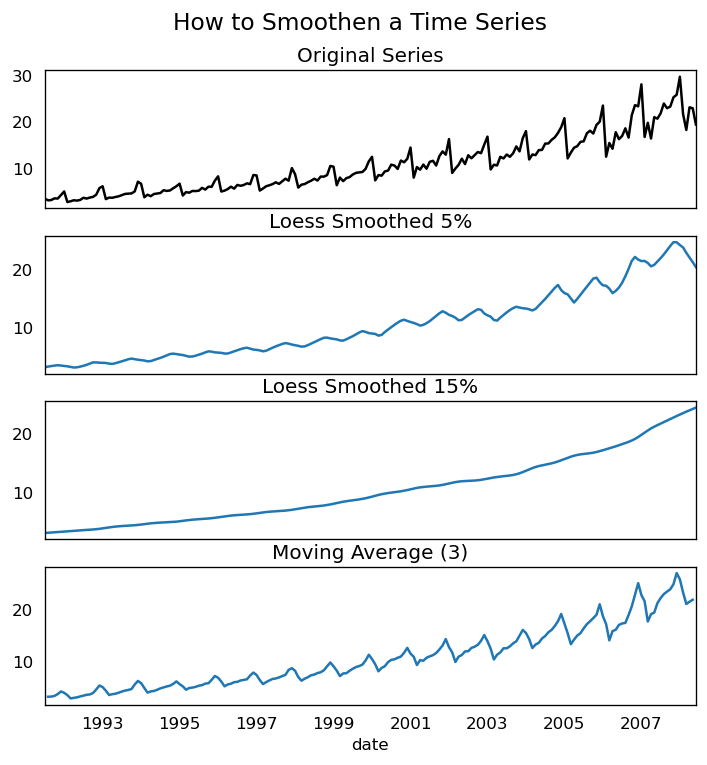

In [10]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

df_orig = df.set_index('date')

# 1. Moving Average
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

<a id="20"></a>
## 20. How to use Granger Causality test to know if one Time Series is helpful in forecasting another?

It is based on the idea that if X causes Y, then the forecast of Y based on previous values of Y AND the previous values of X should outperform the forecast of Y based on previous values of Y alone. So, understand that Granger causality should not be used to test if a lag of Y causes Y. Instead, it is generally used on exogenous (not Y lag) variables only.

It is nicely implemented in the `statsmodel` package. It accepts a 2D array with 2 columns as the main argument. The values are in the first column and the predictor (X) is in the second column.

The **Null hypothesis** is: the series in the second column, does not Granger cause the series in the first. If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

The second argument `maxlag` says till how many lags of Y should be included in the test.

In [11]:
from statsmodels.tsa.stattools import grangercausalitytests
df['month'] = df.date.dt.month
grangercausalitytests(df[['value', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


{1: ({'ssr_ftest': (54.779674835573566, 3.6614258713531555e-12, 200.0, 1),
   'ssr_chi2test': (55.60136995810717, 8.876175235021637e-14, 1),
   'lrtest': (49.14260233004984, 2.38014300604565e-12, 1),
   'params_ftest': (54.77967483557362, 3.6614258713530505e-12, 200.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (162.69891799873255, 1.9133235086855594e-42, 197.0, 2),
   'ssr_chi2test': (333.65666432227385, 3.5267600881273596e-73, 2),
   'lrtest': (196.99559277182198, 1.6709003499115789e-43, 2),
   'params_ftest': (162.69891799873244, 1.9133235086856426e-42, 197.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}